In [ ]:
import os 
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.activations import softmax, relu
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop, Adam
import cv2
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mping
from keras import Sequential
from keras.applications.inception_v3 import InceptionV3
from keras import Model
from keras.callbacks import Callback

In [15]:
train_data = "../dataset/Training/"
test_data = "../dataset/Testing/"

In [16]:
labels = os.listdir(train_data)
labels

['glioma', 'meningioma', 'notumor', 'pituitary']

In [17]:
train_label_path = {}
test_label_path = {}
for i in range(len(labels)):
    train_label_path[i] = os.path.join(train_data, labels[i])
    test_label_path[i] = os.path.join(test_data, labels[i])


In [18]:
train_label_path

{0: '../dataset/Training/glioma',
 1: '../dataset/Training/meningioma',
 2: '../dataset/Training/notumor',
 3: '../dataset/Training/pituitary'}

In [19]:
test_label_path

{0: '../dataset/Testing/glioma',
 1: '../dataset/Testing/meningioma',
 2: '../dataset/Testing/notumor',
 3: '../dataset/Testing/pituitary'}

In [20]:
train_label_count = []
for i in train_label_path.values():
    train_label_count.append(len(os.listdir(i)))

train_label_count


[1321, 1339, 1595, 1457]

/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

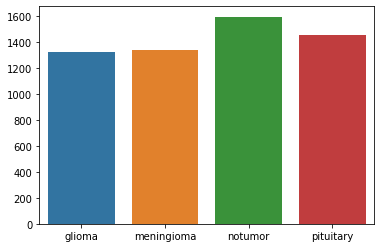

In [21]:
count = range(0, 1500)

sns.barplot(labels, train_label_count)

In [22]:
train_images = {}
test_images = {}

for i, j in train_label_path.items():
    train_images[i] = os.listdir(j)

for i, j in test_label_path.items():
    test_images[i] = os.listdir(j)

In [23]:
train_images

{0: ['Tr-gl_0305.jpg',
  'Tr-gl_0611.jpg',
  'Tr-gl_0917.jpg',
  'Tr-glTr_0000.jpg',
  'Tr-glTr_0001.jpg',
  'Tr-glTr_0002.jpg',
  'Tr-glTr_0003.jpg',
  'Tr-glTr_0004.jpg',
  'Tr-glTr_0005.jpg',
  'Tr-glTr_0006.jpg',
  'Tr-glTr_0007.jpg',
  'Tr-glTr_0008.jpg',
  'Tr-glTr_0009.jpg',
  'Tr-gl_0010.jpg',
  'Tr-gl_0011.jpg',
  'Tr-gl_0012.jpg',
  'Tr-gl_0013.jpg',
  'Tr-gl_0014.jpg',
  'Tr-gl_0015.jpg',
  'Tr-gl_0016.jpg',
  'Tr-gl_0018.jpg',
  'Tr-gl_0019.jpg',
  'Tr-gl_0020.jpg',
  'Tr-gl_0021.jpg',
  'Tr-gl_0022.jpg',
  'Tr-gl_0023.jpg',
  'Tr-gl_0024.jpg',
  'Tr-gl_0025.jpg',
  'Tr-gl_0026.jpg',
  'Tr-gl_0027.jpg',
  'Tr-gl_0028.jpg',
  'Tr-gl_0029.jpg',
  'Tr-gl_0030.jpg',
  'Tr-gl_0031.jpg',
  'Tr-gl_0032.jpg',
  'Tr-gl_0033.jpg',
  'Tr-gl_0034.jpg',
  'Tr-gl_0036.jpg',
  'Tr-gl_0037.jpg',
  'Tr-gl_0038.jpg',
  'Tr-gl_0039.jpg',
  'Tr-gl_0040.jpg',
  'Tr-gl_0041.jpg',
  'Tr-gl_0042.jpg',
  'Tr-gl_0043.jpg',
  'Tr-gl_0044.jpg',
  'Tr-gl_0045.jpg',
  'Tr-gl_0046.jpg',
  'Tr-gl_0047.jpg

In [24]:
train_image_path = {}
test_image_path = {}

for i, j in train_label_path.items():
    l = [os.path.join(j, fname) for fname in os.listdir(j)]
    train_image_path[i] = l


for i, j in test_label_path.items():
    l = [os.path.join(j, fname) for fname in os.listdir(j)]
    test_image_path[i] = l



In [25]:
def random_image_generate():
    random_image = []
    for i, j in train_image_path.items():
        rand_ = random.sample(j, 1)
        random_image.append(rand_)
    print(random_image)
    
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    ax[0, 0].imshow(cv2.imread(random_image[0][0]))
    ax[0, 0].set_title(random_image[0][0].split("/")[3])

    ax[0, 1].imshow(cv2.imread(random_image[1][0]))
    ax[0, 1].set_title(random_image[1][0].split("/")[3])

    ax[1, 0].imshow(cv2.imread(random_image[2][0]))
    ax[1, 0].set_title(random_image[2][0].split("/")[3])

    ax[1, 1].imshow(cv2.imread(random_image[3][0]))
    ax[1, 1].set_title(random_image[3][0].split("/")[3])

    ax[2, 0].imshow(cv2.imread(random_image[4][0]))
    ax[2, 0].set_title(random_image[3][0].split("/")[3])

    plt.show()



In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255.0
)

test_datagen = ImageDataGenerator(
    rescale=1./255.0
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(150, 150),
    class_mode="categorical",
    color_mode="grayscale"
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(150, 150),
    class_mode="categorical",
    color_mode="grayscale"
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [27]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(150, 150, 1), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation=relu))



model.add(Flatten())
model.add(Dense(512, activation=relu))  #128
model.add(Dense(128, activation=relu)) # 64
model.add(Dense(32, activation=relu))
model.add(Dense(len(labels), activation=softmax))

model.summary()

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=["accuracy"]
)

history1 = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 36992)             0

2022-08-09 16:25:05.876881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 16:25:05.914048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 16:25:05.914394: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 16:25:05.915761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/50


2022-08-09 16:25:07.935612: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-09 16:25:08.712127: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-09 16:25:08.712225: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-09 16:25:12.859176: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains

179/179 [==============================] - ETA: 0s - loss: 0.7024 - accuracy: 0.7040

2022-08-09 16:26:29.498897: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.97GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-08-09 16:26:29.498933: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.97GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


179/179 [==============================] - 85s 439ms/step - loss: 0.7024 - accuracy: 0.7040 - val_loss: 0.4980 - val_accuracy: 0.7841
Epoch 2/50
179/179 [==============================] - 74s 412ms/step - loss: 0.3603 - accuracy: 0.8617 - val_loss: 0.3200 - val_accuracy: 0.8574
Epoch 3/50
179/179 [==============================] - 74s 414ms/step - loss: 0.1983 - accuracy: 0.9286 - val_loss: 0.2461 - val_accuracy: 0.9077
Epoch 4/50
179/179 [==============================] - 74s 415ms/step - loss: 0.1221 - accuracy: 0.9582 - val_loss: 0.2571 - val_accuracy: 0.9100
Epoch 5/50
179/179 [==============================] - 74s 415ms/step - loss: 0.0702 - accuracy: 0.9760 - val_loss: 0.3303 - val_accuracy: 0.8963
Epoch 6/50
179/179 [==============================] - 74s 416ms/step - loss: 0.0448 - accuracy: 0.9844 - val_loss: 0.1366 - val_accuracy: 0.9611
Epoch 7/50
179/179 [==============================] - 74s 416ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.1965 - val_accuracy: 0.9

KeyboardInterrupt: 

In [81]:
model.save("../model/brain_tumour_model.h5")

In [109]:
model2 = Sequential()
model2.add(Conv2D(128, (3, 3), input_shape=(150, 150, 1), activation=relu))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation=relu))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation=relu))
model2.add(MaxPool2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation=relu))
model2.add(MaxPool2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation=relu))  #128
model2.add(Dense(128, activation=relu)) # 64
model2.add(Dense(len(labels), activation=softmax))

model2.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=["accuracy"]
)

history2 = model2.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

Epoch 1/50
235/235 [==============================] - 30s 127ms/step - loss: 0.9182 - accuracy: 0.5522 - val_loss: 0.7973 - val_accuracy: 0.5824
Epoch 2/50
235/235 [==============================] - 30s 127ms/step - loss: 0.6080 - accuracy: 0.6770 - val_loss: 0.6541 - val_accuracy: 0.6710
Epoch 3/50
235/235 [==============================] - 30s 128ms/step - loss: 0.5097 - accuracy: 0.6986 - val_loss: 0.6388 - val_accuracy: 0.6314
Epoch 4/50
235/235 [==============================] - 30s 129ms/step - loss: 0.4443 - accuracy: 0.7397 - val_loss: 0.5229 - val_accuracy: 0.6760
Epoch 5/50
235/235 [==============================] - 30s 129ms/step - loss: 0.4037 - accuracy: 0.7456 - val_loss: 0.4625 - val_accuracy: 0.7113
Epoch 6/50
235/235 [==============================] - 30s 129ms/step - loss: 0.3788 - accuracy: 0.7537 - val_loss: 0.4246 - val_accuracy: 0.7020
Epoch 7/50
235/235 [==============================] - 30s 129ms/step - loss: 0.3603 - accuracy: 0.7664 - val_loss: 0.4545 - val_ac

In [62]:
model3 = Sequential()
model3.add(Conv2D(128, (3, 3), input_shape=(150, 150, 1), activation=relu))
model3.add(MaxPool2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation=relu))
model3.add(MaxPool2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation=relu))
model3.add(MaxPool2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation=relu))
model3.add(MaxPool2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(512, activation=relu))  #128
model3.add(Dense(128, activation=relu)) # 64
model3.add(Dense(len(labels), activation=softmax))

model3.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=["accuracy"]
)

history3 = model3.fit(
    train_generator,
    epochs=15,
    steps_per_epoch= 280,
    validation_data=test_generator,
    shuffle=True
)

Epoch 1/15
280/280 [==============================] - 22s 79ms/step - loss: 0.6811 - accuracy: 0.7120 - val_loss: 0.6110 - val_accuracy: 0.7414


In [100]:
train_datagen_aug = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,
    rescale=1.0/255.0
)

test_datagen_aug = ImageDataGenerator(
    rescale=1./255.0,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None,
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_data,
    target_size=(150, 150),
    class_mode="categorical",
    color_mode="grayscale"
)

test_generator_aug = test_datagen_aug.flow_from_directory(
    test_data,
    target_size=(150, 150),
    class_mode="categorical",
    color_mode="grayscale"
)


Found 7496 images belonging to 5 classes.
Found 1614 images belonging to 5 classes.


In [106]:
model4 = Sequential()
model4.add(Conv2D(128, (3, 3), input_shape=(150, 150, 1), activation=relu))
model4.add(MaxPool2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation=relu))
model4.add(MaxPool2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation=relu))
model4.add(MaxPool2D((2, 2)))
model4.add(Conv2D(32, (3, 3), activation=relu))
model4.add(MaxPool2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation=relu))
model4.add(MaxPool2D((2, 2)))

model4.add(Flatten())
model4.add(Dense(512, activation=relu))  #128
model4.add(Dense(128, activation=relu)) # 64
model4.add(Dense(len(labels), activation=softmax))

model4.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(lr=0.0003),
    metrics=["accuracy"]
)

history4 = model4.fit(
    train_generator_aug,
    epochs=15,
    validation_data=test_generator_aug
)

Epoch 1/15
235/235 [==============================] - 34s 143ms/step - loss: 1.3363 - accuracy: 0.3525 - val_loss: 1.3828 - val_accuracy: 0.3544
Epoch 2/15
235/235 [==============================] - 33s 142ms/step - loss: 1.1425 - accuracy: 0.4617 - val_loss: 1.1901 - val_accuracy: 0.4572
Epoch 3/15
235/235 [==============================] - 34s 143ms/step - loss: 1.0167 - accuracy: 0.5175 - val_loss: 1.0299 - val_accuracy: 0.5167
Epoch 4/15
235/235 [==============================] - 34s 144ms/step - loss: 0.9677 - accuracy: 0.5347 - val_loss: 1.0041 - val_accuracy: 0.4957
Epoch 5/15
235/235 [==============================] - 34s 145ms/step - loss: 0.9036 - accuracy: 0.5619 - val_loss: 0.9496 - val_accuracy: 0.5037
Epoch 6/15
235/235 [==============================] - 34s 144ms/step - loss: 0.8531 - accuracy: 0.5910 - val_loss: 1.0086 - val_accuracy: 0.4882
Epoch 7/15
235/235 [==============================] - 34s 145ms/step - loss: 0.8321 - accuracy: 0.5884 - val_loss: 0.8804 - val_ac

In [78]:
def plot(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label="Training Accuracy")
    sns.lineplot(epochs, val_acc, label="Validation Accuracy")
    plt.title("Training Vs Validation Accuracy")
    plt.figure()
    sns.lineplot(epochs, loss, label="Training Loss")
    sns.lineplot(epochs, val_loss, label="Validation Loss")
    plt.title("Training Vs Validation Loss")

/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

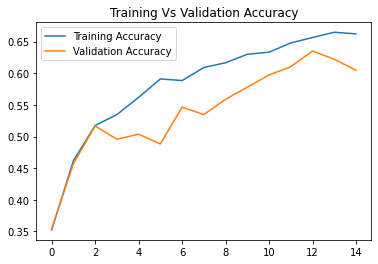

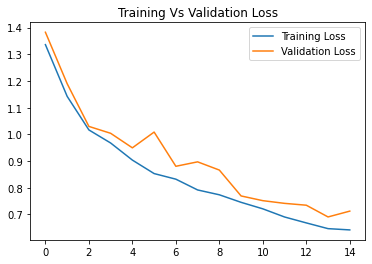

In [107]:
plot(history4)

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss') < 0.15):
      print("\nLoss is lower than 0.15 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [29]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(150, 150, 1), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation=relu))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation=relu))



model.add(Flatten())
model.add(Dense(512, activation=relu))  #128
model.add(Dense(128, activation=relu)) # 64
model.add(Dense(32, activation=relu))
model.add(Dense(len(labels), activation=softmax))

model.summary()

model.compile(
    loss=categorical_crossentropy,
    optimizer=Adam(),
    metrics=["accuracy"]
)

history1 = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[callbacks]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 128)     1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 36992)            

In [30]:
model.save("../model/brain_tumour_model.h5")

In [45]:
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

def predict(file_path):
    img = load_img(file_path, target_size=(150, 150), color_mode="grayscale")
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    pred = np.argmax(classes)
    if pred == 0:
        result = labels[0]
    elif pred == 1:
        result = labels[1]
    elif pred == 2:
        result = labels[2]
    elif pred == 3:
            result = labels[3]
    print(result)


In [46]:
predict("/home/deborshi_roy/Downloads/300px-Hirnmetastase_MRT-T1_KM.jpg")

1/1 [==============================] - 0s 17ms/step
meningioma


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

In [39]:
import cv2
img = cv2.imread("../dataset/Testing/glioma/Te-gl_0010.jpg")
img.shape

(512, 512, 3)

In [2]:
from keras.models import load_model
model_l = load_model("../model/brain_tumor_model.h5")
model_l.save_weights("../model/brain_tumor_model_weights.h5")




2022-08-09 21:00:57.643968: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 288.0KiB (rounded to 294912)requested by op Mul
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-08-09 21:00:57.644002: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2022-08-09 21:00:57.644013: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 14, Chunks in use: 14. 3.5KiB allocated for chunks. 3.5KiB in use in bin. 436B client-requested in use in bin.
2022-08-09 21:00:57.644021: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 2, Chunks in use: 2. 1.0KiB allocated for chunks. 1.0KiB in use in bin. 1.0KiB client-requested in use in bin.
2022-08-09 21:00:57.644029: I tensorflow/core/

ResourceExhaustedError: failed to allocate memory [Op:Mul]

In [ ]:
model_json = model_l.to_json()
with open("../model/brain_tumor_model.json", "w") as json_file:
    json_file.write(model_json)

from keras.models import model_from_json
json_file = open('../model/brain_tumor_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../model/brain_tumor_model_weights_weights.h5")
print("Loaded model from disk")